# **1. Problem Statement**



The telecommunications industry struggles with customer churn, where customers end their service agreements early and prematurely. Elevated churn rates can severely impact revenue and profitability. This project seeks to tackle this challenge by analyzing customer data to identify patterns and key factors driving churn. The objective is to develop a predictive model to pinpoint customers at high risk of leaving, enabling the deployment of proactive retention strategies.

## **Business Case**



### **Objective**

To reduce customer churn and enhance retention rates by analyzing customer data and developing a predictive model. This model will help identify key factors associated with customer attrition and support the creation of targeted retention strategies.

### **Business Benefits**

1. **Increased Revenue**:
   - Proactively retain high-risk customers to boost revenue and reduce the cost of acquiring new customers.

2. **Improved Customer Satisfaction**:
   - Implement tailored retention strategies that enhance the customer experience and increase satisfaction and loyalty.

3. **Efficient Resource Allocation**:
   - Focus retention efforts on customers most likely to churn, optimizing the use of resources.

4. **Competitive Advantage**:
   - Gain a competitive edge by leveraging data-driven insights to better understand and address churn factors.

5. **Cost Savings**:
   - Lower churn-related costs by reducing customer acquisition and service replacement expenses.

### **Approach**

1. **Data Analysis**:
   - Conduct exploratory data analysis (EDA) to understand feature distributions and patterns.

2. **Feature Engineering**:
   - Identify and create relevant features that impact customer churn.

3. **Model Development**:
   - Build and validate predictive models to estimate churn likelihood based on historical data.

4. **Retention Strategies**:
   - Develop actionable strategies to reduce churn, informed by model insights.

By addressing customer churn with a data-driven approach, this project aims to improve retention, drive profitability, and strengthen the company's market position.


# **2. Data Collection**
- **Data Source:** [Retail Telco Customer Churn Dataset on Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)
- **Dataset Details:** The dataset comprises 21 columns and 7043 rows.

## **2.1 Telco Churn Dataset - Variable Description**




| **Variable**          | **Description**                                                                                      | **Type**    |
|-----------------------|------------------------------------------------------------------------------------------------------|-------------|
| **`customerID`**          | **Unique identifier for each customer.**                                                                 | ***object***    |
| **`gender`**              | **Gender of the customer (Male, Female).**                                                               | ***object***    |
| **`SeniorCitizen`**       | **Indicates if the customer is a senior citizen (1 for Yes, 0 for No).**                                 | ***int64***     |
| **`Partner`**             | **Indicates if the customer has a partner (Yes, No).**                                                   | ***object***    |
| **`Dependents`**          | **Indicates if the customer has dependents (Yes, No).**                                                 | ***object***    |
| **`tenure`**              | **Number of months the customer has stayed with the company.**                                           | ***int64***     |
| **`PhoneService`**        | **Indicates if the customer has a phone service (Yes, No).**                                             | ***object***    |
| **`MultipleLines`**       | **Indicates if the customer has multiple lines (Yes, No, No phone service).**                            | ***object***    |
| **`InternetService`**     | **Type of internet service the customer has (DSL, Fiber optic, No).**                                    | ***object***   |
| **`OnlineSecurity`**      | **Indicates if the customer has online security add-on (Yes, No, No internet service).**                 | ***object***    |
| **`OnlineBackup`**        | **Indicates if the customer has online backup add-on (Yes, No, No internet service).**                   | ***object***    |
| **`DeviceProtection`**    | **Indicates if the customer has device protection add-on (Yes, No, No internet service).**               | ***object***    |
| **`TechSupport`**         | **Indicates if the customer has tech support add-on (Yes, No, No internet service).**                    | ***object***    |
| **`StreamingTV`**         | **Indicates if the customer has streaming TV add-on (Yes, No, No internet service).**                    | ***object***    |
| **`StreamingMovies`**     | **Indicates if the customer has streaming movies add-on (Yes, No, No internet service).**                | ***object***    |
| **`Contract`**            | **Type of contract the customer has (Month-to-month, One year, Two year).**                              | ***object***    |
| **`PaperlessBilling`**    | **Indicates if the customer is using paperless billing (Yes, No).**                                      | ***object***    |
| **`PaymentMethod`**       | **Payment method used by the customer (Electronic check, Mailed check, Bank transfer, Credit card).**    | ***object***   |
| **`MonthlyCharges`**      | **The amount charged to the customer monthly.**                                                          | ***float64***   |
| **`TotalCharges`**        | **The total amount charged to the customer**                             | ***float64***    |
| **`Churn`**               | **Indicates if the customer has churned (Yes, No).**                                                     | ****object***    |


## **2.2 Import Library**

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas to always display all columns
pd.set_option('display.max_columns', None)


# ML model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **2.3 Loading Data as Pandas DataFrame**

In [ ]:
# defining the path
path = "/content/drive/MyDrive/Data science Projects/Almabetter Project and Assignment/M5 /Dataset/Telco-Customer-Churn.csv"

Telco_df = pd.read_csv(path)

# First View of Data
Telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **2.4 Columns and Rows**

In [ ]:
# Nnumber of rows and Column
columns = Telco_df.shape[1]
rows = Telco_df.shape[0]

print(f"Number of Rows : {rows}")
print(f"Number of Columns : {columns}")

Number of Rows : 7043
Number of Columns : 21


## **2.5 List of Features**

In [ ]:
# Columns in the dataset
columns = Telco_df.columns
print(columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


## **2.6 Understanding Feature Data Types and Converting If Necessary**

In [ ]:
Telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Changing the datatype of Total Charges to float
Telco_df['TotalCharges'] = pd.to_numeric(Telco_df['TotalCharges'], errors='coerce')

# **3. Data Checks**

To ensure the quality and integrity of your data, perform the following checks:

1. **Check for Missing Values**
   - Identify any missing or null values in the dataset.
   - Calculate the percentage of missing values for each column to assess the extent of missing data.

2. **Check for Duplicates**
   - Identify and count any duplicate rows in the dataset.
   - Remove duplicates if necessary to avoid redundant data and ensure accuracy.

3. **Check the Number of Unique Values in Each Column**
   - Determine the number of unique values for each column.
   - This helps understand the diversity and uniqueness of data, especially in categorical columns.

4. **Check Statistics of the Dataset**
   - Compute and review basic statistical measures for numerical columns, such as:
     - Mean
     - Median
     - Standard deviation
     - Minimum
     - Maximum
   - These statistics provide insights into the distribution and spread of numerical data.

5. **Check for Outliers**
   - Identify outliers in numerical columns to understand if there are extreme values affecting the dataset.
   - Use visualization techniques (e.g., box plots) or statistical methods to detect and analyze outliers.

6. **Check Categories in Categorical Columns**
   - Identify and list all categories present in each categorical column.
   - Ensure that categories are correctly labeled, consistent, and standardized across the dataset.


## **3.1 Checking For Missing Value**

In [ ]:
# Checking for null value
print(Telco_df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


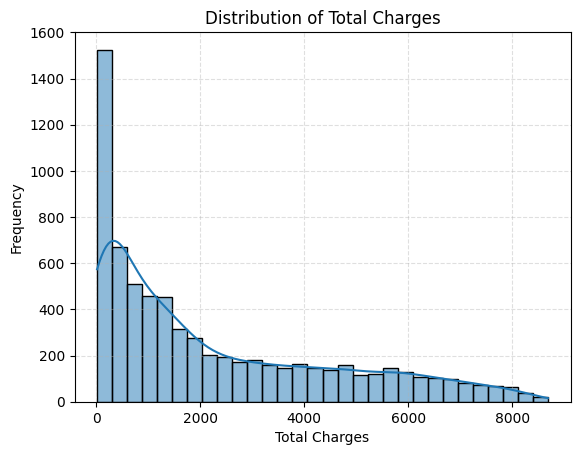

In [ ]:
# There are missing value in Total Charges
# Let's Check the distribution of Total Charges
sns.histplot(data=Telco_df, x='TotalCharges', bins=30, kde=True)
plt.title('Distribution of Total Charges')
plt.ylabel('Frequency')
plt.xlabel('Total Charges')

plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

**Insights**:

There are 11 rows with null value in Total Charges.
Since Data is Right skewed we will use Median Imputation
- **Median** is robust to outliers and skewed data. When data is right-skewed, using the median instead of the mean prevents the imputation from being influenced by extreme values, providing a better central tendency for imputation.

In [ ]:
# replacing na values of Telco_df TotalCharges column with median
Telco_df['TotalCharges'] = Telco_df['TotalCharges'].fillna(Telco_df['TotalCharges'].median())

## **3.2 Checking for Duplicate Value**

In [ ]:
# Checking for duplicate entries
duplicate = Telco_df.duplicated().sum()
print(f"Number of duplicate rows : {duplicate}")

Number of duplicate rows : 0


## **3.3 Check the Number of Unique Values in Each Column**

In [ ]:
print(Telco_df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


## **3.4 Check Statistics of the Dataset**

In [ ]:
Telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Insights:**

- Senior Citizens: 16.2% of customers are senior citizens.
- Tenure: Average tenure is 32.4 months, with a wide range from 0 to 72 months.
- Monthly Charges: Average is 64.76, with significant variation.
- Total Charges: Average is 2,281.92, reflecting high variability based on tenure and monthly charges.

## **3.5 Check for Outliers**

In [ ]:
# Seperating Categorical. Numerical Column
# Categorical Column
categorical_columns = Telco_df.select_dtypes(include=['object']).columns

# Numerical Column
numerical_columns = Telco_df.select_dtypes(exclude=['object']).columns

print(f"Categorical Column : {categorical_columns}")
print(f"\nNumerical Column : {numerical_columns}")

Categorical Column : Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

Numerical Column : Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


### **Custom Function: Summary Stats for Identifying Outliers**

In [ ]:
def summary_stats(df : pd.DataFrame, columns: list) -> pd.DataFrame:
  print(f"Summary Statistics for column : {columns}")

  stats = {}
  for column in columns:
    # Mean
    mean = df[column].mean()

    # Median
    median = df[column].median()

    # Standard Deviation
    std = df[column].std()

    # Variance
    var = df[column].var()

    # Q1, Q3, IQR
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # outlier upper and lower bound
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Min and Max
    min = df[column].min()
    max = df[column].max()

    # percentage outlier
    outlier_percentage = np.round(df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0] / df.shape[0] * 100, 2)

    stats_dict = {
        'Mean': mean,
        'Median': median,
        'Standard Deviation': std,
        'Variance': var,
        'Max':max,
        'Min':min,
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr,
        'Outlier Lower Bound': lower_bound,
        'Outlier Upper Bound': upper_bound,
        'Outlier Percentage': outlier_percentage
    }
    stats[column] = stats_dict

  return pd.DataFrame(stats).T


In [ ]:
summary_stats(Telco_df, numerical_columns)

Summary Statistics for column : Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


,Mean,Median,Standard Deviation,Variance,Max,Min,Q1,Q3,IQR,Outlier Lower Bound,Outlier Upper Bound,Outlier Percentage
SeniorCitizen,0.162147,0.000,0.368612,1.358745e-01,1.00,0.00,0.000,0.00,0.000,0.0000,0.0000,16.21
tenure,32.371149,29.000,24.559481,6.031681e+02,72.00,0.00,9.000,55.00,46.000,-60.0000,124.0000,0.00
MonthlyCharges,64.761692,70.350,30.090047,9.054109e+02,118.75,18.25,35.500,89.85,54.350,-46.0250,171.3750,0.00
TotalCharges,2281.916928,1397.475,2265.270398,5.131450e+06,8684.80,18.80,402.225,3786.60,3384.375,-4674.3375,8863.1625,0.00


There are No outlier's in our Dataset

## **3.6 Check Categories in Categorical Columns**

In [ ]:
# Print unique categories in categorical columns
for column in categorical_columns:
    unique_categories = Telco_df[column].unique()
    num_unique_categories = len(unique_categories)
    print(f"There are {num_unique_categories} unique categories in '{column}': {unique_categories}")

There are 7043 unique categories in 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
There are 2 unique categories in 'gender': ['Female' 'Male']
There are 2 unique categories in 'Partner': ['Yes' 'No']
There are 2 unique categories in 'Dependents': ['No' 'Yes']
There are 2 unique categories in 'PhoneService': ['No' 'Yes']
There are 3 unique categories in 'MultipleLines': ['No phone service' 'No' 'Yes']
There are 3 unique categories in 'InternetService': ['DSL' 'Fiber optic' 'No']
There are 3 unique categories in 'OnlineSecurity': ['No' 'Yes' 'No internet service']
There are 3 unique categories in 'OnlineBackup': ['Yes' 'No' 'No internet service']
There are 3 unique categories in 'DeviceProtection': ['No' 'Yes' 'No internet service']
There are 3 unique categories in 'TechSupport': ['No' 'Yes' 'No internet service']
There are 3 unique categories in 'StreamingTV': ['No' 'Yes' 'No internet service']
There are 3 unique categories in 'Stream

### Changing Categorical Labels

**Original Labels:**
- `'No internet service'`
- `'No phone service'`

**Modified Labels:**
- Changed to `'No'`

**Reason:**
Simplifying these categories consolidates similar values, reducing complexity and making the data easier to analyze.

**Implications:**
- **Advantages:** Easier data handling with fewer categories.
- **Disadvantages:** Loss of specificity regarding the type of service.


In [ ]:
# Replace 'No phone service' with 'No' in the 'MultipleLines' column
Telco_df['MultipleLines'].replace({'No phone service': 'No'}, inplace=True)

# Replace 'No internet service' with 'No' in the 'InternetService' column
Telco_df['InternetService'].replace({'No internet service': 'No'}, inplace=True)

# Replace 'No internet service' with 'No' in the 'OnlineSecurity' column
Telco_df['OnlineSecurity'].replace({'No internet service': 'No'}, inplace=True)

# Replace 'No internet service' with 'No' in the 'OnlineBackup' column
Telco_df['OnlineBackup'].replace({'No internet service': 'No'}, inplace=True)

# Replace 'No internet service' with 'No' in the 'DeviceProtection' column
Telco_df['DeviceProtection'].replace({'No internet service': 'No'}, inplace=True)

# Replace 'No internet service' with 'No' in the 'TechSupport' column
Telco_df['TechSupport'].replace({'No internet service': 'No'}, inplace=True)

# Replace 'No internet service' with 'No' in the 'StreamingTV' column
Telco_df['StreamingTV'].replace({'No internet service': 'No'}, inplace=True)

# Replace 'No internet service' with 'No' in the 'StreamingMovies' column
Telco_df['StreamingMovies'].replace({'No internet service': 'No'}, inplace=True)


# **4. Exploring Data (Visualization)**

## **4.0 Distribution of Total Charges, Tenure, and Monthly Charges**

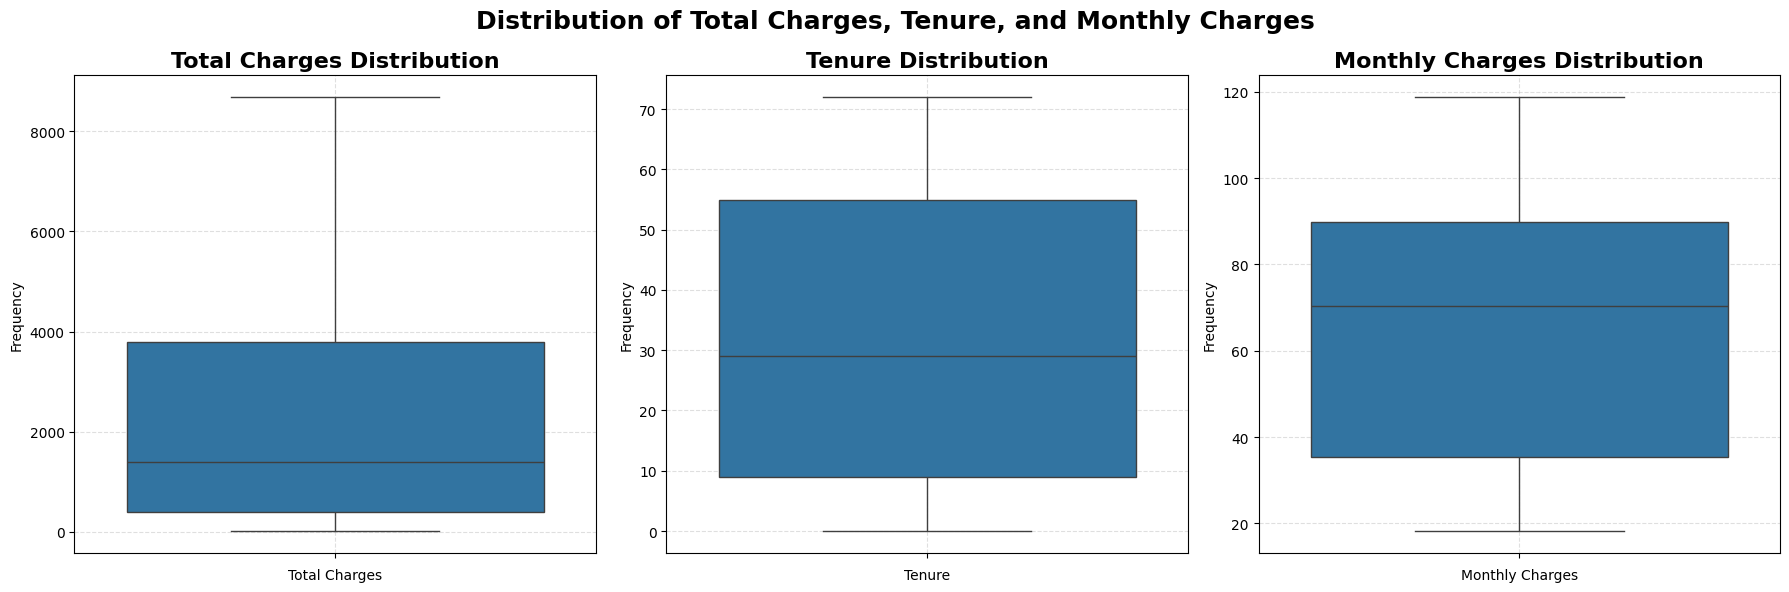

In [ ]:
columns = ['TotalCharges', 'tenure', 'MonthlyCharges']
title = ['Total Charges', 'Tenure', 'Monthly Charges']

plt.figure(figsize=(18, 6))
for i, col in enumerate(columns):
  plt.subplot(1,3,i+1)
  sns.boxplot(data=Telco_df, y=col)
  plt.title(f"{title[i]} Distribution", fontsize=16, fontweight='bold')
  plt.xlabel(title[i])
  plt.ylabel('Frequency')
  plt.grid(True, linestyle='--', alpha=0.4)

plt.suptitle('Distribution of Total Charges, Tenure, and Monthly Charges', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

## **4.1 Visualization of `Monthly Charges`**

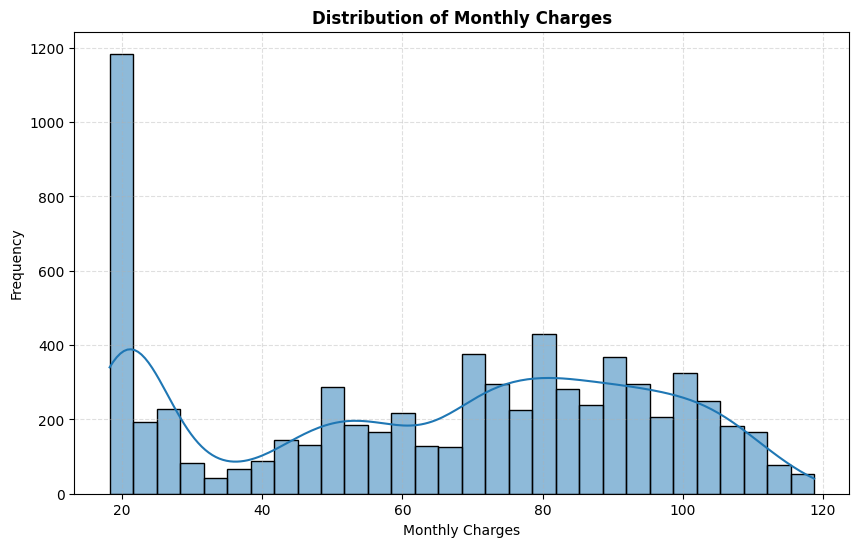

In [ ]:
plt.figure(figsize=(10, 6))

# Create a histogram with a KDE overlay to visualize the distribution of 'MonthlyCharges'
sns.histplot(data=Telco_df, x='MonthlyCharges', bins=30, kde=True)

# Set the title of the plot
plt.title('Distribution of Monthly Charges', fontweight='bold')

# Label the y-axis
plt.ylabel('Frequency')

# Label the x-axis
plt.xlabel('Monthly Charges')

# Add a grid to the plot for better readability
plt.grid(True, linestyle='--', alpha=0.4)

# Display the plot
plt.show()

The distribution is skewed to the right, indicating that a larger proportion of customers have lower monthly charges.

#### **Ploting `Monthly Charges` Distribution Across Different Categories**

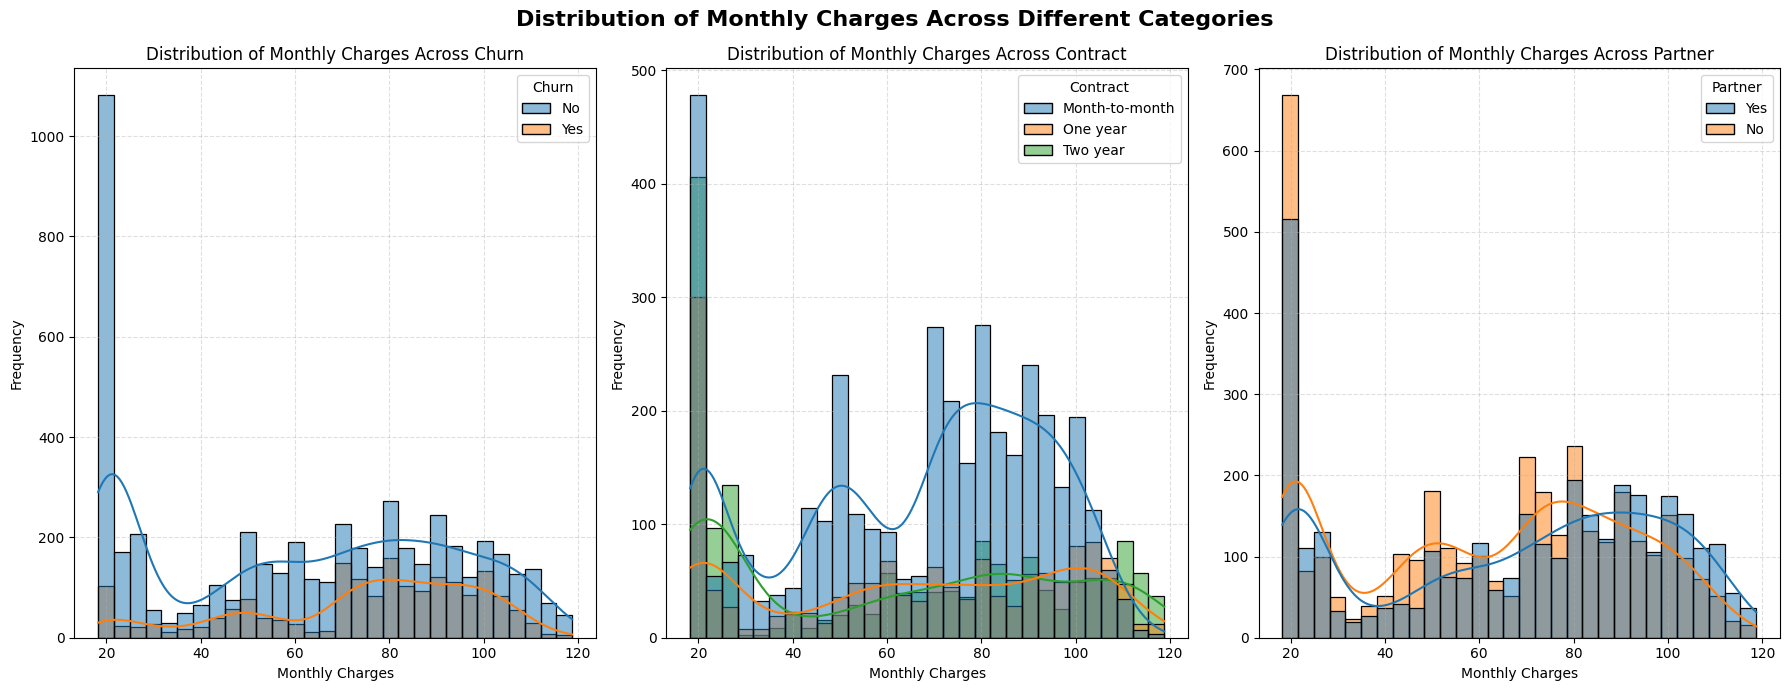

In [ ]:
# Set up the figure for three subplots
plt.figure(figsize=(18, 7))

# First subplot: Distribution of Monthly Charges by Churn
plt.subplot(1, 3, 1)
sns.histplot(data=Telco_df, x='MonthlyCharges', hue='Churn', bins=30, kde=True)
plt.title('Distribution of Monthly Charges Across Churn')
plt.ylabel('Frequency')
plt.xlabel('Monthly Charges')
plt.grid(True, linestyle='--', alpha=0.4)

# Second subplot: Distribution of Monthly Charges by Contract
plt.subplot(1, 3, 2)
sns.histplot(data=Telco_df, x='MonthlyCharges', hue='Contract', bins=30, kde=True)
plt.title('Distribution of Monthly Charges Across Contract')
plt.ylabel('Frequency')
plt.xlabel('Monthly Charges')
plt.grid(True, linestyle='--', alpha=0.4)

# Third subplot: Distribution of Monthly Charges by Partner
plt.subplot(1, 3, 3)
sns.histplot(data=Telco_df, x='MonthlyCharges', hue='Partner', bins=30, kde=True)
plt.title('Distribution of Monthly Charges Across Partner')
plt.ylabel('Frequency')
plt.xlabel('Monthly Charges')
plt.grid(True, linestyle='--', alpha=0.4)

# Add a single title for the entire figure
plt.suptitle('Distribution of Monthly Charges Across Different Categories', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

**Insights**:

- Churn and Monthly Charges: Customers with higher monthly charges exhibit a higher likelihood of churning, indicating that pricing could be a factor influencing retention.

- Contract Type and Monthly Charges: Month-to-month customers generally have higher monthly charges compared to those with one-year or two-year contracts, suggesting that flexibility may come at a premium.

- Partner and Monthly Charges: Customers with a partner tend to have higher average monthly charges compared to those without a partner, indicating that shared expenses may lead to increased spending.



## **4.2 Visualization of `Total Charges`**

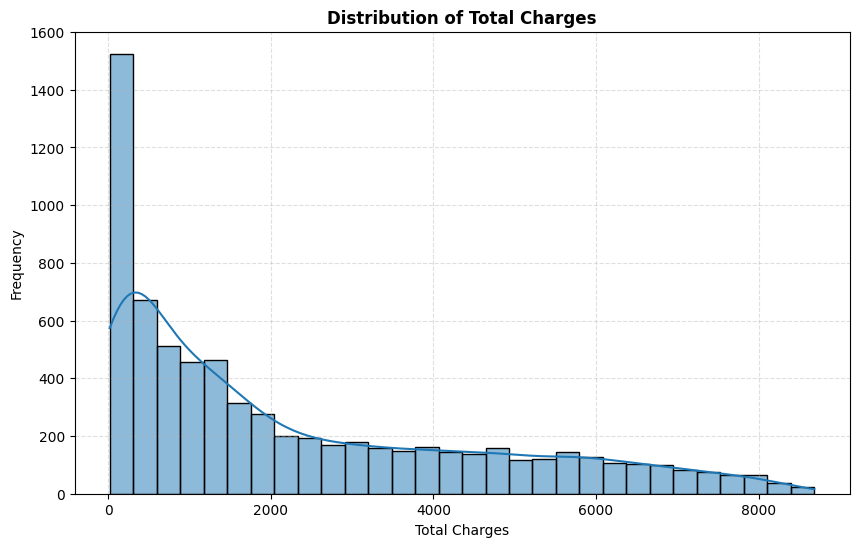

In [ ]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Plot the distribution of 'TotalCharges' with KDE
sns.histplot(data=Telco_df, x='TotalCharges', bins=30, kde=True)

# Set plot title and labels
plt.title('Distribution of Total Charges', fontweight='bold')
plt.ylabel('Frequency')
plt.xlabel('Total Charges')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.4)

# Display the plot
plt.show()

The distribution is heavily skewed to the right, indicating that a majority of customers have low total charges, while a smaller number have significantly higher charges.

### **Ploting `Total_Charges` Distribution Across Different Categories**

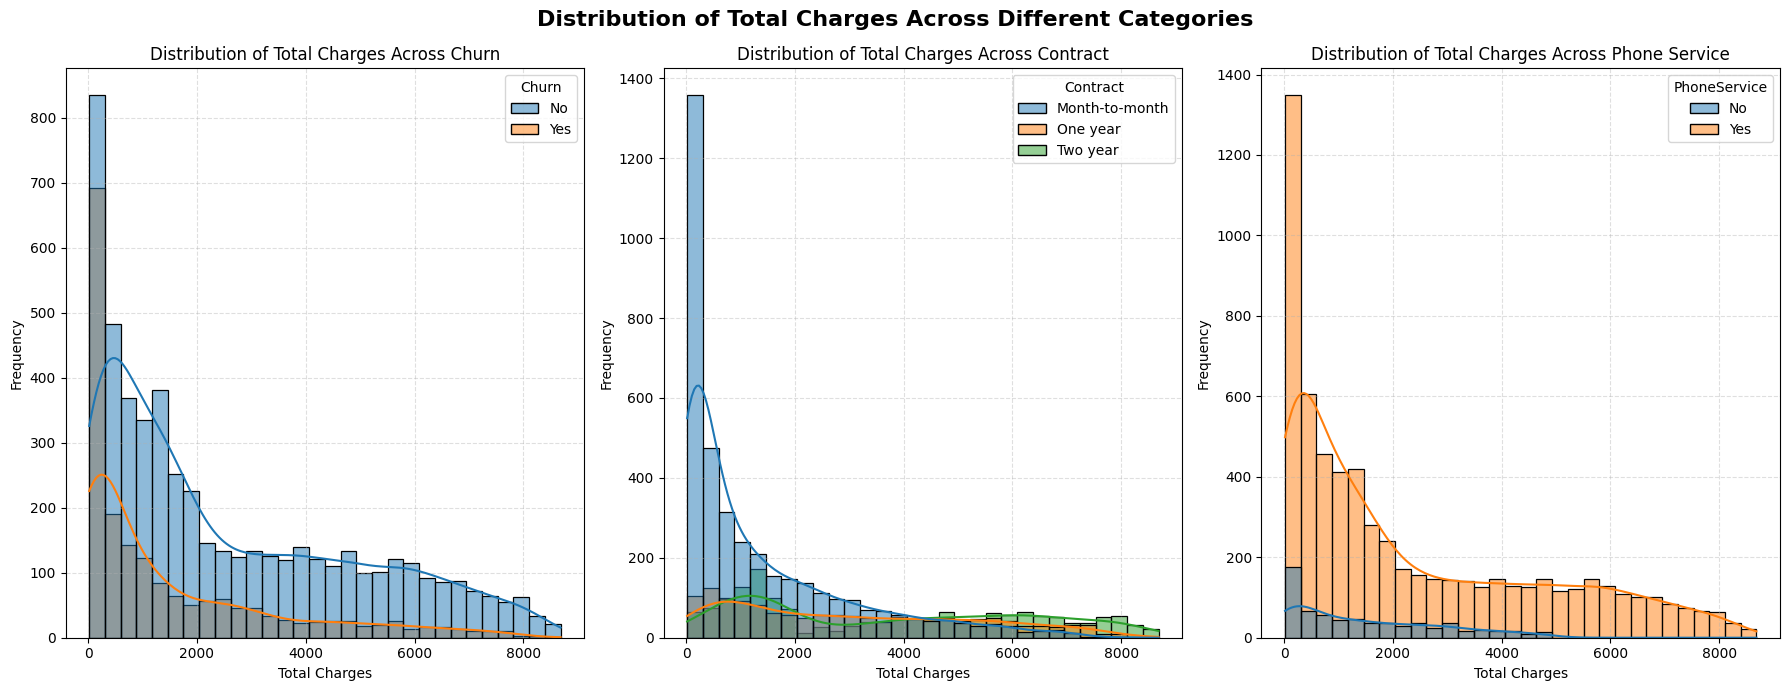

In [ ]:
# Set up the figure for three subplots
plt.figure(figsize=(18, 7))

# First subplot: Distribution of Total Charges by Churn
plt.subplot(1, 3, 1)
sns.histplot(data=Telco_df, x='TotalCharges', hue='Churn', bins=30, kde=True)
plt.title('Distribution of Total Charges Across Churn')
plt.ylabel('Frequency')
plt.xlabel('Total Charges')
plt.grid(True, linestyle='--', alpha=0.4)

# Second subplot: Distribution of Total Charges by Contract
plt.subplot(1, 3, 2)
sns.histplot(data=Telco_df, x='TotalCharges', hue='Contract', bins=30, kde=True)
plt.title('Distribution of Total Charges Across Contract')
plt.ylabel('Frequency')
plt.xlabel('Total Charges')
plt.grid(True, linestyle='--', alpha=0.4)

# Third subplot: Distribution of Total Charges by Phone Service
plt.subplot(1, 3, 3)
sns.histplot(data=Telco_df, x='TotalCharges', hue='PhoneService', bins=30, kde=True)
plt.title('Distribution of Total Charges Across Phone Service')
plt.ylabel('Frequency')
plt.xlabel('Total Charges')
plt.grid(True, linestyle='--', alpha=0.4)

# Add a single title for the entire figure
plt.suptitle('Distribution of Total Charges Across Different Categories', fontsize=16, fontweight='bold')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

**insights**

1. **Churn and Total Charges**:
   - Customers with higher total charges are more likely to churn. This suggests that higher charges may be associated with dissatisfaction or financial stress, leading to a higher likelihood of cancellation.

2. **Contract Type and Total Charges**:
   - Customers on month-to-month contracts tend to have higher total charges compared to those with longer-term contracts (e.g., one year or two years). This indicates that flexible, short-term contracts might be associated with higher charges, possibly due to higher monthly rates or additional fees.

3. **Phone Service and Total Charges**:
   - Customers with phone service have higher total charges on average compared to those without. This finding suggests that having phone service is linked to increased overall charges, which might be due to the additional cost of including phone services in their plans.


## **4.3 Visulaization of `Tenure`**

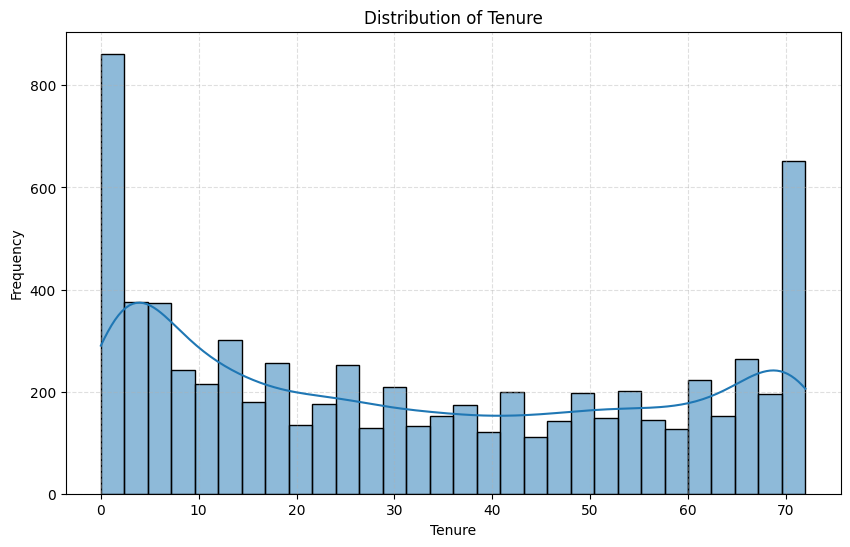

In [ ]:
# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a histogram with KDE on 'tenure'
sns.histplot(data=Telco_df, x='tenure', bins=30, kde=True)

# Set the title of the plot
plt.title('Distribution of Tenure')
# Label the y-axis
plt.ylabel('Frequency')
# Label the x-axis
plt.xlabel('Tenure')

# Add a grid
plt.grid(True, linestyle='--', alpha=0.4)

# Display the plot
plt.show()

- The distribution is bimodal, suggesting two distinct groups of customers: one with relatively short tenures and another with longer tenures.

- The distribution is slightly skewed to the right, indicating a small

### **Ploting `Tenure` Distribution Across Different Categories**

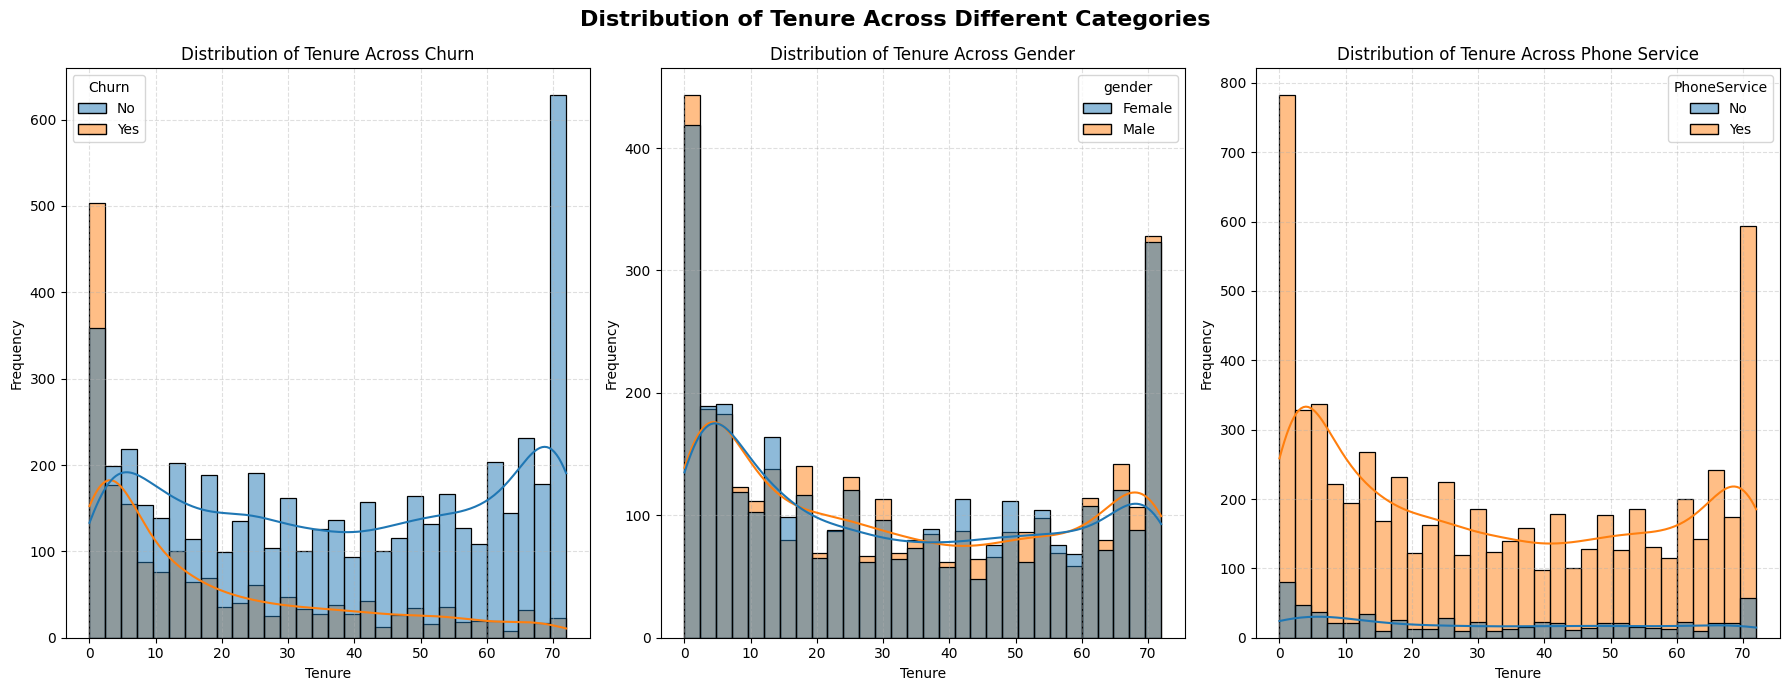

In [ ]:
# Set the size of the figure
plt.figure(figsize=(18, 7))

# Create the first histogram
plt.subplot(1, 3, 1)
sns.histplot(data=Telco_df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title('Distribution of Tenure Across Churn')
plt.ylabel('Frequency')
plt.xlabel('Tenure')
plt.grid(True, linestyle='--', alpha=0.4)

# Create the second histogram
plt.subplot(1, 3, 2)
sns.histplot(data=Telco_df, x='tenure', hue='gender', bins=30, kde=True)
plt.title('Distribution of Tenure Across Gender')
plt.ylabel('Frequency')
plt.xlabel('Tenure')
plt.grid(True, linestyle='--', alpha=0.4)

# Create the third histogram
plt.subplot(1, 3, 3)
sns.histplot(data=Telco_df, x='tenure', hue='PhoneService', bins=30, kde=True)
plt.title('Distribution of Tenure Across Phone Service')
plt.ylabel('Frequency')
plt.xlabel('Tenure')
plt.grid(True, linestyle='--', alpha=0.4)

# Add a single title for the entire figure
plt.suptitle('Distribution of Tenure Across Different Categories', fontsize=16, fontweight='bold')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

**Insights:**

- **Churn and Tenure:** Customers with shorter tenures are more likely to churn.
- **Gender and Tenure:** There are slight differences in tenure distributions between male and female customers, but the overall patterns are similar.
- **Phone Service and Tenure:** Customers with phone service have a slightly higher average tenure than those without.

In [ ]:
Telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## **4.4 Categorical Data Distribution Visualization**

This section visualizes the distribution of key categorical variables using pie charts. The features analyzed include:

- **Churn**
- **Gender**
- **Contract**
- **Phone Service**
- **Internet Service**
- **Payment Method**

These visualizations provide insights into the proportions of different categories within each feature, helping to understand the distribution and prevalence of various categorical attributes.


### **Distribution of `Churn` `Gender` and `Contract`**

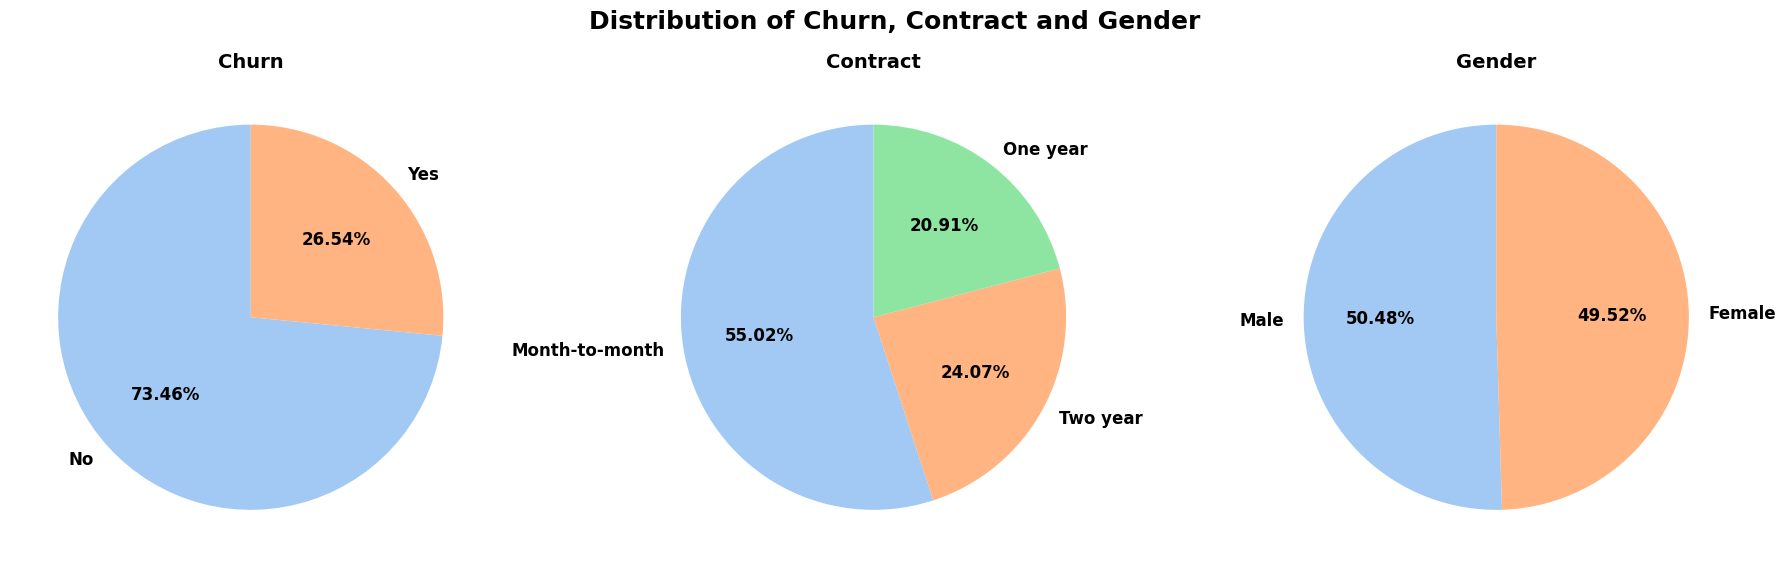

In [ ]:
# Define categorical features and titles for pie charts
cat_features = ['Churn', 'Contract', 'gender']
title = ["Churn", "Contract", 'Gender']
colors = sns.color_palette("pastel")  # Define color palette

# Set figure size
plt.figure(figsize=(18, 6))

# Loop through each categorical feature and create a pie chart
for i, column in enumerate(cat_features):
    plt.subplot(1, 3, i+1)  # Create subplot
    size = Telco_df[column].value_counts()  # Get value counts for the feature
    plt.pie(size, labels=size.index, autopct='%.2f%%', startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'}, colors=colors)
    plt.title(title[i], fontsize=14, fontweight='bold')  # Set title for each pie chart

# Add a single title for the entire figure
plt.suptitle('Distribution of Churn, Contract and Gender', fontsize=18, fontweight='bold')

# Hide axis for pie charts
plt.axis('off')

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()


**Insights:**

- **Churn:** A significant portion of customers (73.46%) remain with the company, while 26.54% churn.
- **Contract:** The majority of customers (55.02%) have month-to-month contracts, followed by two-year (24.07%) and one-year (20.91%) contracts.
- **Gender:** The customer base is fairly balanced, with 50.48% male and 49.52% female customers.

### **Distribution of `PhoneService` `InternetService` and `PaymentMethod`**

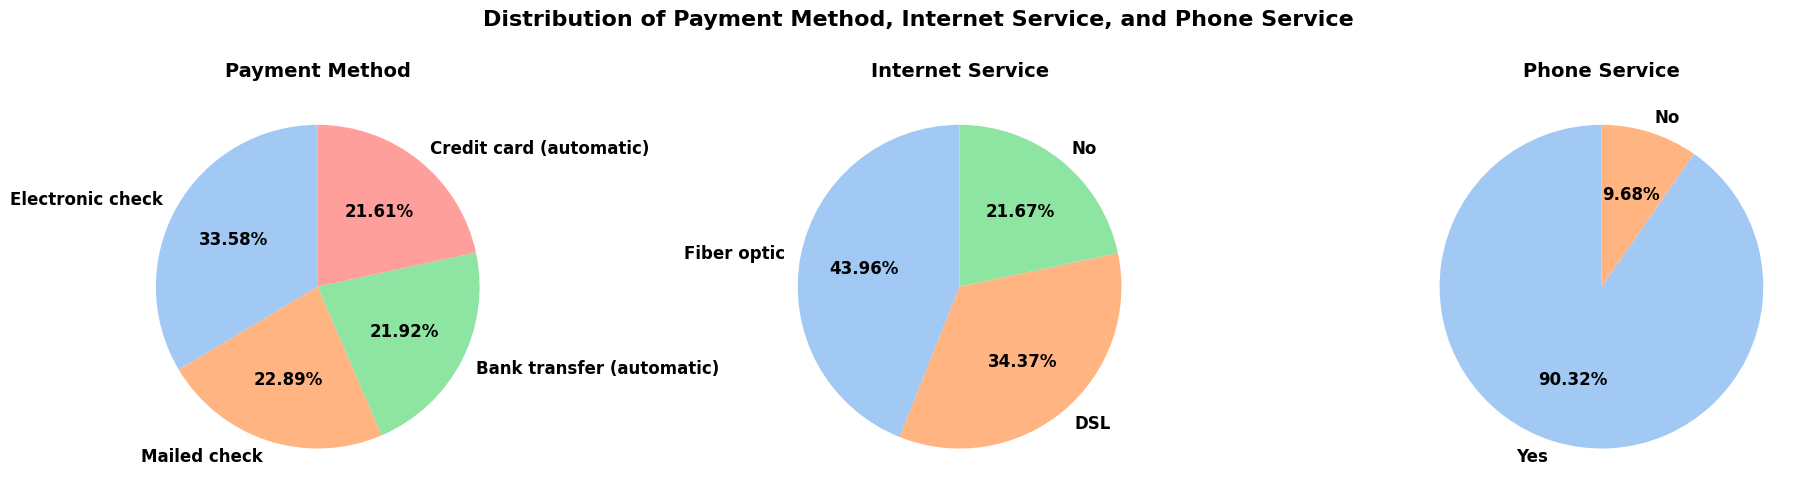

In [ ]:
# Define categorical features and titles for pie charts
cat_features = ['PaymentMethod', 'InternetService', 'PhoneService']
title = ["Payment Method", "Internet Service", "Phone Service"]
colors = sns.color_palette("pastel")  # Define color palette

# Set figure size
plt.figure(figsize=(18, 10))

# Loop through each categorical feature and create a pie chart
for i, column in enumerate(cat_features):
    plt.subplot(2, 3, i+1)  # Create subplot
    size = Telco_df[column].value_counts()  # Get value counts for the feature
    plt.pie(size, labels=size.index, autopct='%.2f%%', startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'}, colors=colors)
    plt.title(title[i], fontsize=14, fontweight='bold')  # Set title for each pie chart

# Add a single title for the entire figure
plt.suptitle('Distribution of Payment Method, Internet Service, and Phone Service', fontsize=16, fontweight='bold')

# Hide axis for pie charts
plt.axis('off')

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()

**Insights:**

- **Payment Method:** Electronic check is the most popular payment method, followed by credit card (automatic) and mailed check. Bank transfer (automatic) is used by a smaller percentage of customers.
- **Internet Service:** Fiber optic is the most common internet service, followed by DSL. A significant portion of customers do not have internet service.
- **Phone Service:** The vast majority of customers have phone service, while only a small percentage do not.

## **4.5 Customer Demographic Distribution Analysis: `SeniorCitizens`, `Partners `and `Dependents`**

In [ ]:
print(Telco_df['SeniorCitizen'].value_counts(), '\n')
print(Telco_df['Partner'].value_counts(), '\n')
print(Telco_df['Dependents'].value_counts())

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64 

Partner
No     3641
Yes    3402
Name: count, dtype: int64 

Dependents
No     4933
Yes    2110
Name: count, dtype: int64


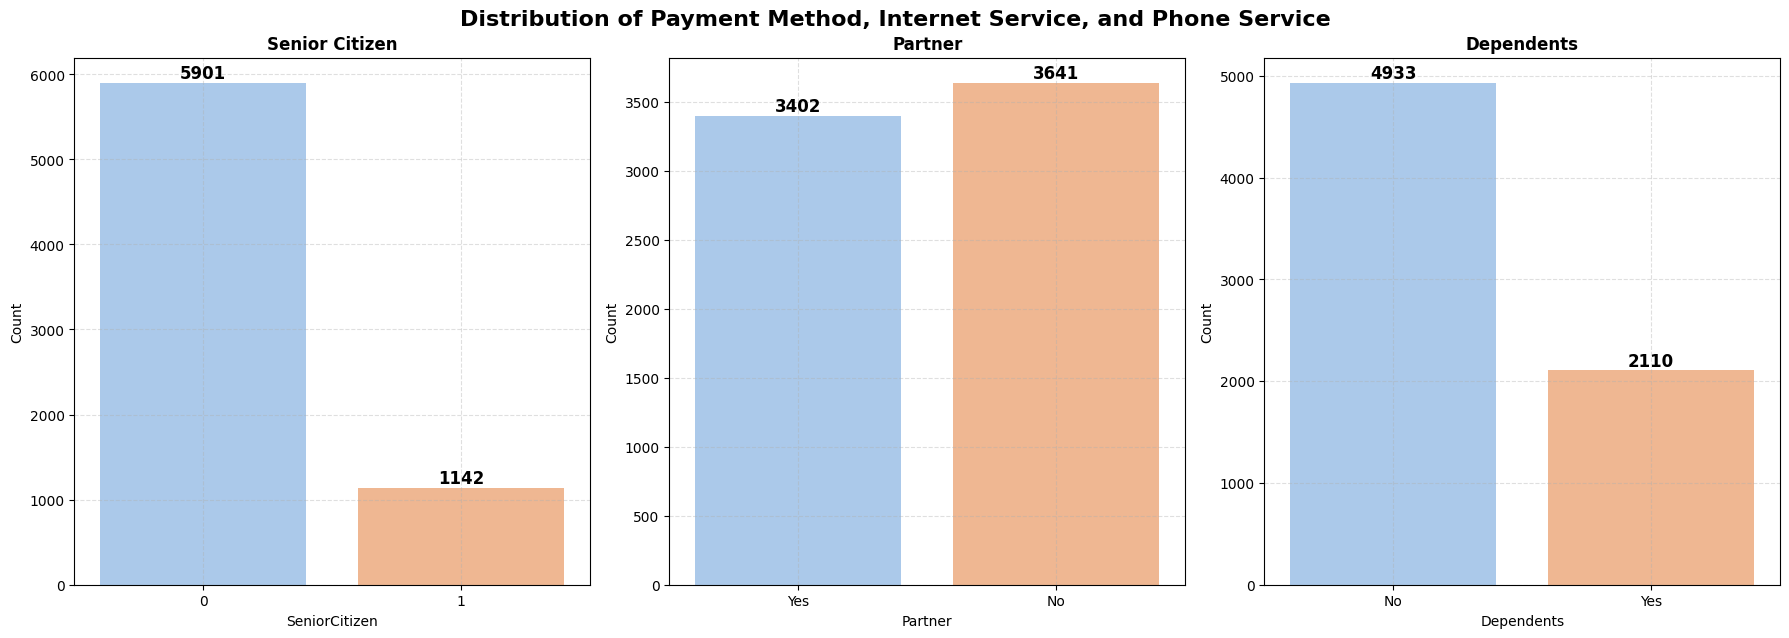

In [ ]:
# Define categorical features and titles for pie charts
cat_features = ['SeniorCitizen', 'Partner', 'Dependents']
title = ["Senior Citizen", "Partner", "Dependents"]
# Set figure size
plt.figure(figsize=(18, 12))

# Loop through each categorical feature and create countplot
for i, column in enumerate(cat_features):
    plt.subplot(2, 3, i+1)  # Create subplot
    ax = sns.countplot(data=Telco_df, x=column, palette=colors)
    # Add labels to the bars
    for container in ax.containers:
      ax.bar_label(container, color='black', size=12, fontweight='bold')
    plt.title(title[i], fontsize=12, fontweight='bold')  # Set title
    plt.xlabel(column)  # Set x-axis label
    plt.ylabel('Count')  # Set y-axis label
    plt.grid(True, linestyle='--', alpha=0.4)  # Add grid

# Add a single title for the entire figure
plt.suptitle('Distribution of Payment Method, Internet Service, and Phone Service', fontsize=16, fontweight='bold')

plt.savefig('cat.png', dpi=300, bbox_inches='tight')
# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()

**Insights on Customer Attributes:**

- **Senior Citizen:** There are 1,142 senior citizens compared to 5,901 non-senior citizens. This indicates that a smaller portion of the customer base consists of senior citizens.
- **Partner:** There are 3,402 customers with partners and 3,641 without partners. This shows a nearly balanced distribution, though slightly more customers do not have partners.
- **Dependents:** The number of customers without dependents is 4,933, while those with dependents total 2,110. This highlights that a larger segment of the customer base does not have dependents.

## **4.6 Visualization Churn Count by `Gender`**

In [ ]:
# map churn as 1 and 0
Telco_df['Churn_mapped'] = Telco_df['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
#churn based on gender
churn_gender = Telco_df.groupby('gender')['Churn_mapped'].sum()
churn_gender

,Churn_mapped
gender,
Female,939
Male,930


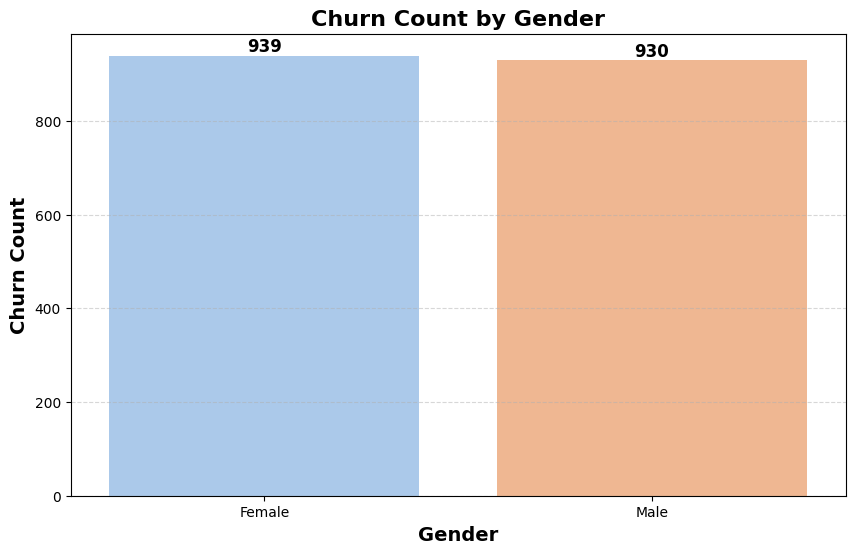

In [ ]:
# Create the plot
f, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x=churn_gender.index, y=churn_gender.values, ax=ax, palette='pastel')

# Set title and labels with improved formatting
ax.set_title('Churn Count by Gender', fontsize=16, fontweight='bold')
ax.set_xlabel('Gender', fontsize=14, fontweight='bold')
ax.set_ylabel('Churn Count', fontsize=14, fontweight='bold')
for container in ax.containers:
    ax.bar_label(container,color='black', size = 12, fontweight='bold')
# Add gridlines for y-axis
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.show()

**Insights:**

- The churn count is nearly identical between genders, with **939** females and **930** males.
This indicates that gender does not have a significant impact on churn rates in this dataset, suggesting that other factors may be more influential in determining customer churn.

## **4.7 Visualization of `MonthlyCharges`, `Tenure`, and `TotalCharges` by `Churn` Status**

In [ ]:
churn_grouped  = Telco_df.groupby('Churn')[['MonthlyCharges', 'tenure', 'TotalCharges']].mean().round(2).reset_index()
print(churn_grouped)

  Churn  MonthlyCharges  tenure  TotalCharges
0    No           61.27   37.57       2552.88
1   Yes           74.44   17.98       1531.80


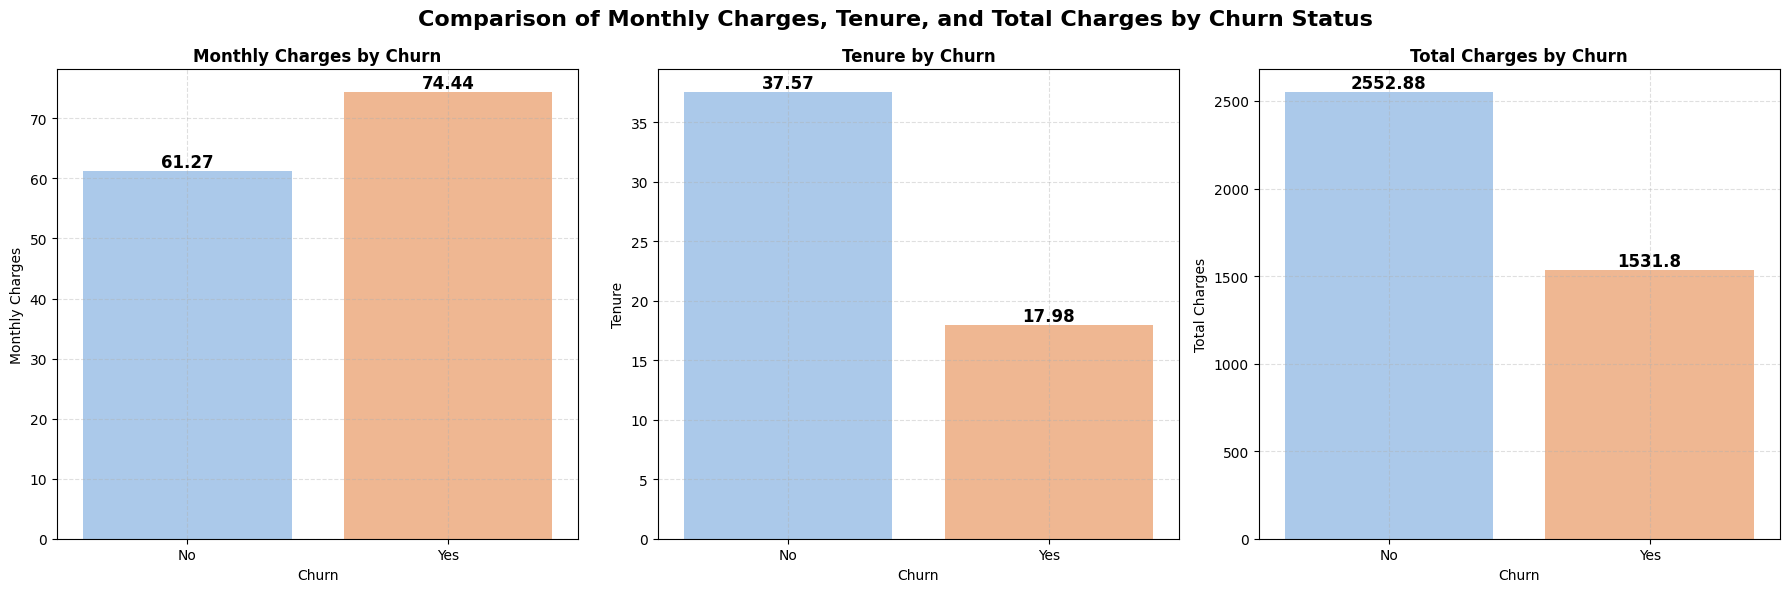

In [ ]:
columns = ['MonthlyCharges', 'tenure', 'TotalCharges']
title = ['Monthly Charges', 'Tenure', 'Total Charges']

plt.figure(figsize=(18, 6))
for i, col in enumerate(columns):
  df = Telco_df.groupby('Churn')[col].mean().round(2).reset_index()
  plt.subplot(1, 3, i+1)
  ax = sns.barplot(x='Churn', y=col, data=df, palette='pastel')
  # Add labels to the bars
  for container in ax.containers:
    ax.bar_label(container, color='black', size=12, fontweight='bold')
  plt.title(f"{title[i]} by Churn", fontsize=12, fontweight='bold')  # Set title
  plt.xlabel('Churn')  # Set x-axis label
  plt.ylabel(title[i])  # Set y-axis label
  plt.grid(True, linestyle='--', alpha=0.4)  # Add grid

# Add a single title for the entire figure
plt.suptitle('Comparison of Monthly Charges, Tenure, and Total Charges by Churn Status', fontsize=16, fontweight='bold')
plt.tight_layout()  # Adjust the layout
plt.show()  # Display the plot

**Insights:**

- **Monthly Charges**: Customers who churn have higher average monthly charges 74.44 compared to those who do not churn 61.27. This suggests that higher costs might be a contributing factor to customer churn.

- **Tenure**: Customers who churn have a significantly lower average tenure 17.98 months compared to those who do not churn 37.57 months. This indicates that long-term customers are less likely to churn.

- **Total Charges**: The average total charges for customers who churn 1,531 are lower than for those who stay 2,552. This is likely due to their shorter tenure.

These insights suggest that higher monthly charges and shorter tenure are associated with a higher likelihood of customer churn.

## **4.8 Visualization of Churn Counts Across `PhoneService`, `InternetService`, and `Contract`**

In [ ]:
phone_churn_count = Telco_df.groupby('PhoneService')['Churn_mapped'].sum().reset_index().sort_values(by='Churn_mapped', ascending=False)
internet_churn_count = Telco_df.groupby('InternetService')['Churn_mapped'].sum().reset_index().sort_values(by='Churn_mapped', ascending=False)
contract_churn_count = Telco_df.groupby('Contract')['Churn_mapped'].sum().reset_index().sort_values(by='Churn_mapped', ascending=False)

print(phone_churn_count , '\n')
print(internet_churn_count, '\n')
print(contract_churn_count, '\n')

  PhoneService  Churn_mapped
1          Yes          1699
0           No           170 

  InternetService  Churn_mapped
1     Fiber optic          1297
0             DSL           459
2              No           113 

         Contract  Churn_mapped
0  Month-to-month          1655
1        One year           166
2        Two year            48 



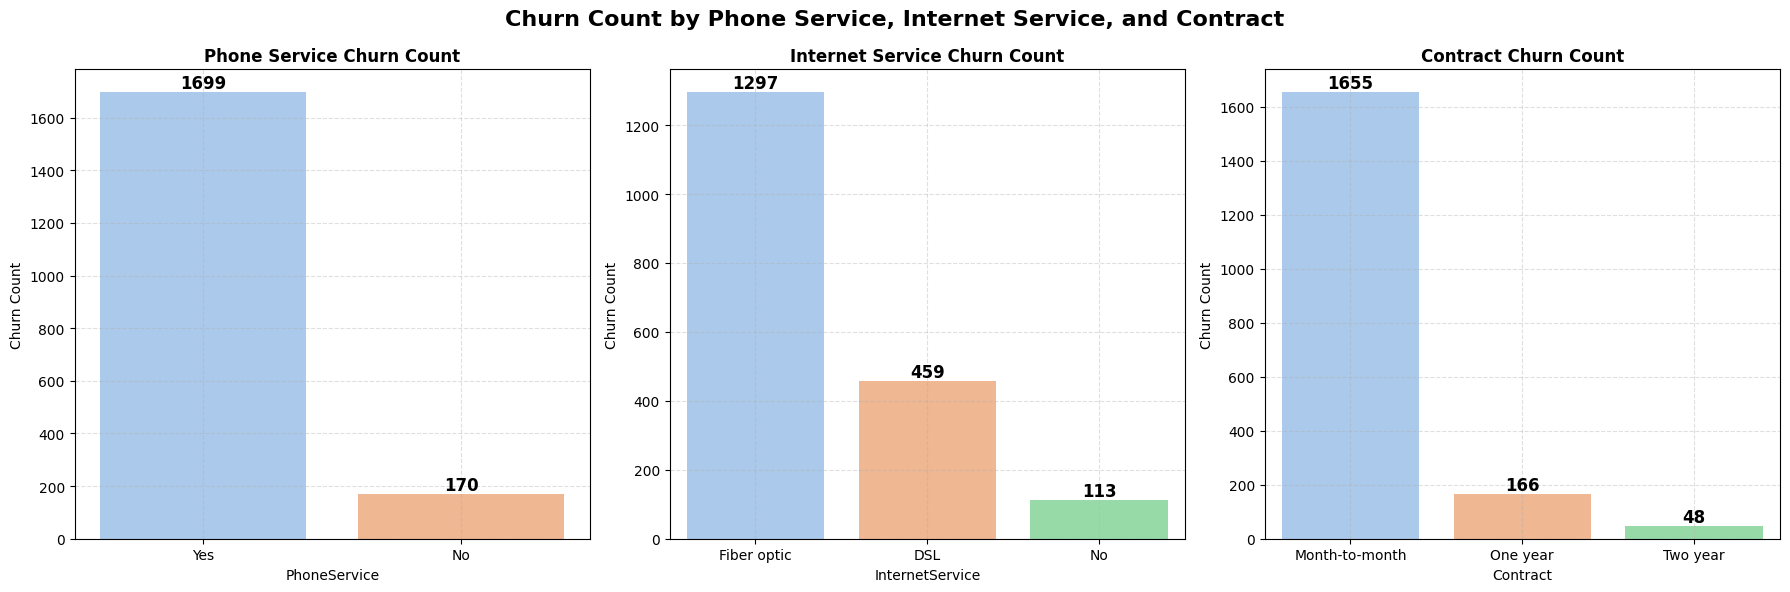

In [ ]:
columns = ['PhoneService', 'InternetService', 'Contract']
title = ['Phone Service', 'Internet Service', 'Contract']

plt.figure(figsize=(18, 6))
for i, col in enumerate(columns):
  df = Telco_df.groupby(col)['Churn_mapped'].sum().reset_index().sort_values(by='Churn_mapped', ascending=False)
  plt.subplot(1, 3, i+1)
  ax = sns.barplot(x=col, y='Churn_mapped', data=df, palette='pastel')
  # Add labels to the bars
  for container in ax.containers:
    ax.bar_label(container, color='black', size=12, fontweight='bold')
  plt.title(f"{title[i]} Churn Count", fontsize=12, fontweight='bold')  # Set title
  plt.xlabel(col)  # Set x-axis label
  plt.ylabel('Churn Count')  # Set y-axis label
  plt.grid(True, linestyle='--', alpha=0.4)  # Add grid

# Add a single title for the entire figure
plt.suptitle('Churn Count by Phone Service, Internet Service, and Contract', fontsize=16, fontweight='bold')
plt.tight_layout()  # Adjust the layout
plt.show()  # Display the plot

**Insights:**

- **Phone Service:**
  - Customers with phone service exhibit significantly higher churn rates compared to those without. Specifically, 1699 customers with phone service churned, while only 170 without phone service did.

- **Internet Service:**
  - Fiber optic internet users show the highest churn rate 1297, followed by DSL users 459, and no internet service users have the lowest churn 113. This suggests that customers with fiber optic internet are more likely to churn.

- **Contract Type:**
  - Month-to-month contracts are associated with the highest churn rate 1655, whereas longer-term contracts one year and two years have notably lower churn rates 166 and 48, respectively. This indicates that customers on short-term contracts are more likely to leave.

Overall, these insights highlight key areas for focus in customer retention strategies, such as addressing issues related to fiber optic internet service and improving the appeal of longer-term contracts.


## **4.9 Correlation Analysis of `TotalCharges`, `MonthlyCharges`, and `Tenure`**

In [ ]:
df_corr = Telco_df[['TotalCharges', 'MonthlyCharges', 'tenure']].corr()
print(df_corr)

                TotalCharges  MonthlyCharges    tenure
TotalCharges        1.000000        0.650864  0.825464
MonthlyCharges      0.650864        1.000000  0.247900
tenure              0.825464        0.247900  1.000000


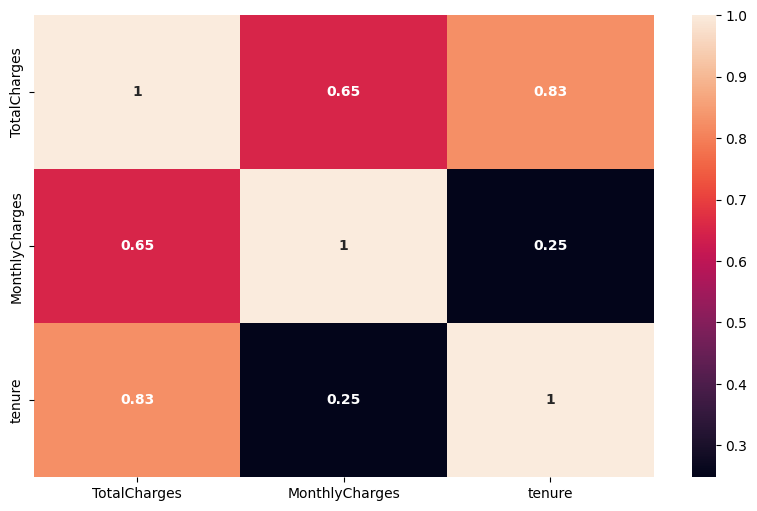

In [ ]:
# Plot the Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True,  annot_kws={"fontweight": "bold"})
plt.show()

**Insights:**

- **Total Charges and Tenure:** Strong correlation 0.83, indicating that longer tenure leads to higher total charges.

- **Total Charges and Monthly Charges:** Moderate correlation 0.65, showing that higher monthly charges generally result in higher total charges.

- **Monthly Charges and Tenure:** Weak correlation 0.25, suggesting that tenure has little impact on monthly charges.

## **4.10 Relationship Between Charges, Tenure, and Churn: Pair Plot Analysis**

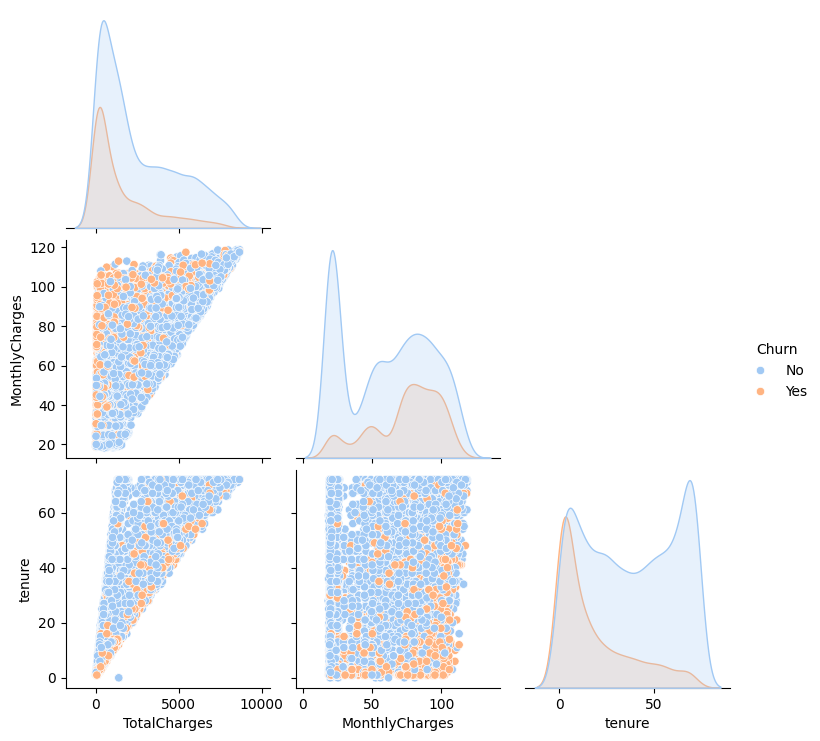

In [ ]:
columns = ['TotalCharges', 'MonthlyCharges', 'tenure', 'Churn']

# ploting the pair plot
sns.pairplot(Telco_df[columns], hue='Churn', palette='pastel',  corner=True)
plt.show()

# **5. Model Training**

## **5.1 Preparing `X` and `y` Variable**

In [ ]:
# Selecting X and y
X = Telco_df.drop(['customerID', 'Churn', 'Churn_mapped'], axis=1)
y = Telco_df['Churn_mapped']

In [ ]:
# Checking shape of X and y
X.shape, y.shape

((7043, 19), (7043,))

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


## **5.2 Checking Data Imbalance**

In [ ]:
print(y.value_counts())

Churn_mapped
0    5174
1    1869
Name: count, dtype: int64


**Note:** The dataset shows a significant class imbalance, with 5174 instances labeled as "0" (no churn) and 1869 instances labeled as "1" (churn). The ratio of the majority class ("no churn") to the minority class ("churn") is approximately **2.77:1**. This imbalance could lead to biased model predictions favoring the majority class, making it crucial to address this issue to improve model performance and ensure accurate predictions for the minority class.

In [ ]:
# We will over sample the minority class
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print(f"Shape before oversampling: {X.shape}, {y.shape}")
print(f"Shape after oversampling: {X_resampled.shape}, {y_resampled.shape}")

Shape before oversampling: (7043, 19), (7043,)
Shape after oversampling: (10348, 19), (10348,)


## **5.3 Test Train Split**

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Print the shape of Train Test
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8278, 19)
X_test shape: (2070, 19)
y_train shape: (8278,)
y_test shape: (2070,)


## **5.4 Data Preprocessing: Standardization & One-Hot Encoding**

In [ ]:
# Import Preprocessing tools
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_columns = ['MonthlyCharges', 'tenure', 'TotalCharges']
cat_columns = [column for column in X.columns if X[column].dtype == 'object']

# Create a column transformer
scaler = StandardScaler()
ohe = OneHotEncoder(drop='first', sparse_output=False)
ct = ColumnTransformer([
    ('scaler', scaler, num_columns),
    ('ohe', ohe, cat_columns)
], remainder='passthrough')

# Fit and transform the data
X_train_processed = ct.fit_transform(X_train)
X_test_processed = ct.transform(X_test)
# Change X_train and X_test to DataFrame
X_train = pd.DataFrame(X_train_processed, columns=ct.get_feature_names_out())
X_test = pd.DataFrame(X_test_processed, columns=ct.get_feature_names_out())

In [ ]:
# print shape
print(f"Shape after preprocessing: {X_train.shape}")
print(f"Shape after preprocessing: {X_test.shape}")

Shape after preprocessing: (8278, 23)
Shape after preprocessing: (2070, 23)


In [ ]:
X_train.head()

,scaler__MonthlyCharges,scaler__tenure,scaler__TotalCharges,ohe__gender_Male,ohe__Partner_Yes,ohe__Dependents_Yes,ohe__PhoneService_Yes,ohe__MultipleLines_Yes,ohe__InternetService_Fiber optic,ohe__InternetService_No,ohe__OnlineSecurity_Yes,ohe__OnlineBackup_Yes,ohe__DeviceProtection_Yes,ohe__TechSupport_Yes,ohe__StreamingTV_Yes,ohe__StreamingMovies_Yes,ohe__Contract_One year,ohe__Contract_Two year,ohe__PaperlessBilling_Yes,ohe__PaymentMethod_Credit card (automatic),ohe__PaymentMethod_Electronic check,ohe__PaymentMethod_Mailed check,remainder__SeniorCitizen
0,-0.601481,-1.108680,-0.906549,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,-1.689084,-0.650179,-0.825027,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.607933,0.308506,0.405003,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.606193,0.350188,0.503474,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,-0.095094,0.516915,0.253350,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## **5.5 Custom Function for Evaluating ML Model Performance**

In [ ]:
# Import evaluation matrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report, RocCurveDisplay

In [ ]:
# creating Custom Function for Evaluating ML Model Performance
def model_evaluation(true, pred):
    """
    Evaluates the performance of a classification model.

    Parameters:
    true (array-like): True labels of the dataset.
    pred (array-like): Predicted labels by the model.

    Returns:
    tuple: A tuple containing the following metrics:
        - accuracy (float): The ratio of correctly predicted instances.
        - precision (float): The ratio of correctly predicted positive observations to the total predicted positives.
        - recall (float): The ratio of correctly predicted positive observations to all observations in the actual class.
        - f1 (float): The weighted average of precision and recall.
    """
    accuracy = accuracy_score(true, pred)
    precision = precision_score(true, pred)
    recall = recall_score(true, pred)
    f1 = f1_score(true, pred)

    return accuracy, precision, recall, f1

## **5.6  Base Model Training and Evaluation**

In [ ]:
# Import model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

model_list = []

for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  accuracy_train, precision_train, recall_train, f1_train = model_evaluation(y_train, y_pred_train)

  accuracy, precision, recall, f1 = model_evaluation(y_test, y_pred)

  model_dict = {
      "Model Name": list(models.keys())[i],
      "Accuracy":accuracy,
      "Precision":precision,
      "Recall":recall,
      "F1 Score":f1
  }

  model_list.append(model_dict)

  print(f"{list(models.keys())[i]} has been trained")
  print('Model performance for Train set')
  print(f"- Accuracy: {accuracy_train:.4f}")
  print(f"- Precision: {precision_train:.4f}")
  print(f"- Recall: {recall_train:.4f}")
  print(f"- F1 Score: {f1_train:.4f}")
  print("-"*30)
  print('Model performance for Test set')
  print(f"- Accuracy: {accuracy:.4f}")
  print(f"- Precision: {precision:.4f}")
  print(f"- Recall: {recall:.4f}")
  print(f"- F1 Score: {f1:.4f}")
  print("="*30)
  print("\n")

Logistic Regression has been trained
Model performance for Train set
- Accuracy: 0.7654
- Precision: 0.7458
- Recall: 0.8029
- F1 Score: 0.7733
------------------------------
Model performance for Test set
- Accuracy: 0.7850
- Precision: 0.7682
- Recall: 0.8246
- F1 Score: 0.7954


Decision Tree has been trained
Model performance for Train set
- Accuracy: 0.9982
- Precision: 0.9976
- Recall: 0.9988
- F1 Score: 0.9982
------------------------------
Model performance for Test set
- Accuracy: 0.8850
- Precision: 0.8376
- Recall: 0.9590
- F1 Score: 0.8942


Random Forest has been trained
Model performance for Train set
- Accuracy: 0.9982
- Precision: 0.9966
- Recall: 0.9998
- F1 Score: 0.9982
------------------------------
Model performance for Test set
- Accuracy: 0.8986
- Precision: 0.8626
- Recall: 0.9514
- F1 Score: 0.9048


Naive Bayes has been trained
Model performance for Train set
- Accuracy: 0.7498
- Precision: 0.7257
- Recall: 0.8005
- F1 Score: 0.7613
---------------------------

## **5.7 Selecting the Two Best Performing Base Model**

In [ ]:
result_df = pd.DataFrame(model_list).sort_values(by=['Accuracy', 'F1 Score'], ascending=False).set_index('Model Name')
result_df

,Accuracy,Precision,Recall,F1 Score
Model Name,,,,
Random Forest,0.898551,0.862576,0.951382,0.904805
Decision Tree,0.885024,0.837635,0.959009,0.894222
XGBoost,0.853623,0.820998,0.909438,0.862958
Gradient Boosting,0.800966,0.776236,0.853194,0.812897
K-Nearest Neighbors,0.785507,0.749794,0.865586,0.803540
Logistic Regression,0.785024,0.768206,0.824595,0.795402
AdaBoost,0.784541,0.768000,0.823642,0.794848
Naive Bayes,0.767633,0.743568,0.826501,0.782844


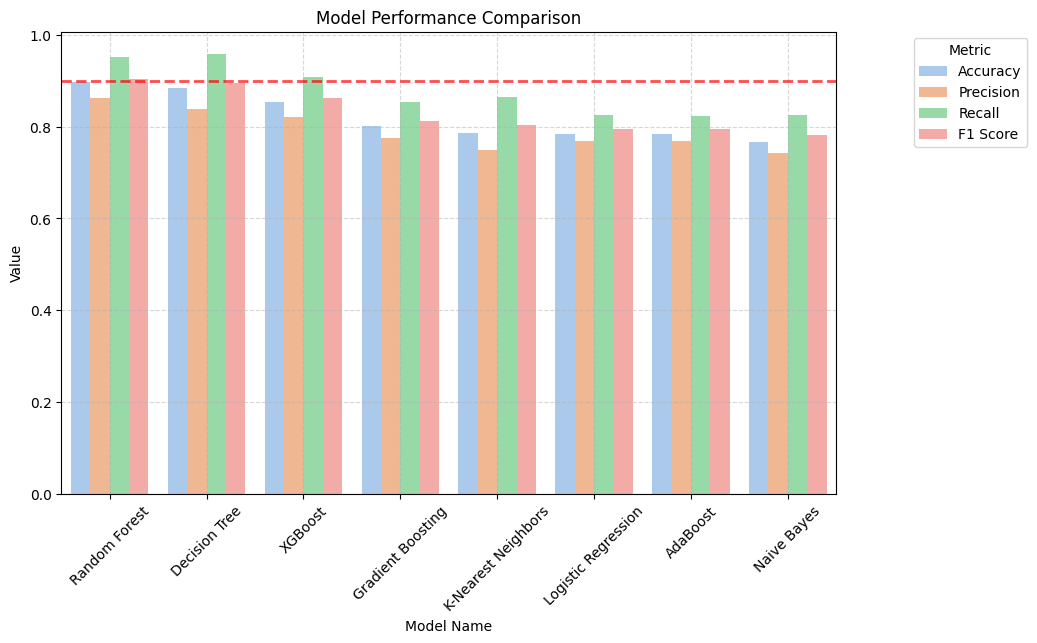

In [ ]:
result_df_melt = result_df.reset_index().melt(id_vars=['Model Name'], value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
result_df_melt

# Plot a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=result_df_melt, x='Model Name', y='value', hue='variable', palette='pastel')
plt.title('Model Performance Comparison')
plt.xlabel('Model Name')
plt.ylabel('Value')
plt.axhline(y=0.9, color='red', linestyle='--', linewidth=2, alpha=0.7)
plt.grid(True, linestyle='--', alpha=0.5)

plt.legend(title='Metric', loc=(1.1, 0.75))
plt.xticks(rotation=45)
plt.show()

### **Model Performance Overview**
- **Random Forest** is the top model with the highest accuracy 0.89, precision 0.868, recall 0.956, and F1 score 0.910. It offers an excellent balance between precision and recall, making it highly reliable.
- **Decision Tree** is the second-best, with an accuracy of 0.886 and an F1 score of 0.894. It has a strong recall, though slightly less precise than Random Forest.
- **XGBoost** ranks third, with solid performance but slightly lower metrics compared to the top two models.

### Selected Models:
- **Random Forest** and **Decision Tree** are selected for their superior balance of performance metrics, making them ideal for further development.

### Observation:
The **Random Forest** and **Decision Tree** models stand out as the most effective classifiers for this project. They demonstrate a strong balance between precision and recall, ensuring reliable identification of positive instances. These models will be prioritized for refinement in the next phase.


## **5.8 Hyper Parameter Tuning of Base Model**

### **Hyperparameter Tuning `Decision Tree` model.**

In [ ]:
# Import model
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Hyperparameter Tuning using GridSearchCV
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

model_1 = DecisionTreeClassifier(random_state=42)
# params grid search
param_grid = {
    'max_depth': [None, 10, 15, 20, 25, 30],     # Depth of the tree to prevent overfitting
    'min_samples_split': [2, 5, 10, 15],          # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6, 8],          # Minimum number of samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2', 0.5], # Number of features to consider for the best split; 0.5 for fraction of features
    'min_impurity_decrease': [0.0, 0.001, 0.01, 0.1]   # Minimum impurity decrease for a split to be considered
}

grid = GridSearchCV(model_1, param_grid=param_grid, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

grid_preds = grid.predict(X_test)

accuracy, precision, recall, f1 = model_evaluation(y_test, grid_preds)

print(f"Best Parameters: {grid.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.8826
Precision: 0.8462
Recall: 0.9390
F1 Score: 0.8902


In [ ]:
# Model Performance Before Hyperparameter Tuning
print(f"Model Performance Before Hyperparameter Tuning:\n {result_df.loc['Decision Tree']}")

Model Performance Before Hyperparameter Tuning:
 Accuracy     0.885024
Precision    0.837635
Recall       0.959009
F1 Score     0.894222
Name: Decision Tree, dtype: float64



**Insights:**
- **Precision Increased:** The model's precision improved to 0.8462, reducing false positives.
- **Recall Decreased:** Recall decreased to 0.9390, indicating more missed true positives.
- **Accuracy and F1 Score:** Both metrics slightly decreased, reflecting the trade-off between precision and recall.

### **Hyperparameter Tuning `RandomForest` model**

In [ ]:
# Import model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize the RandomForestClassifier
model_2 = RandomForestClassifier(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],        # Number of trees in the forest
    'criterion': ['gini', 'entropy'],                  # Measure for splitting nodes
    'max_depth': [None, 10, 20, 30, 40],               # Maximum depth of each tree
    'min_samples_split': [2, 5, 10, 15],               # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6, 8],               # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2', 0.5],      # Number of features to consider for the best split
    'bootstrap': [True, False]                         # Whether bootstrap samples are used when building trees
}

# Initialize RandomizedSearchCV with n_iter for the number of random combinations to try
model_2_gird = RandomizedSearchCV(model_2, param_distributions=param_distributions,
                                   n_iter=50, cv=3, random_state=42, n_jobs=-1)

# Fit the model
model_2_gird.fit(X_train, y_train)

# Predict using the best model
model_2_gird_preds = model_2_gird.predict(X_test)

# Evaluate the model
accuracy, precision, recall, f1 = model_evaluation(y_test, model_2_gird_preds)

# Print the best parameters and performance metrics
print(f"Best Parameters: {model_2_gird.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': True}
Accuracy: 0.9005
Precision: 0.8624
Recall: 0.9561
F1 Score: 0.9069


In [ ]:
# Model Performance Before Hyperparameter Tuning
print(f"Model Performance Before Hyperparameter Tuning:\n {result_df.loc['Random Forest']}")

Model Performance Before Hyperparameter Tuning:
 Accuracy     0.898551
Precision    0.862576
Recall       0.951382
F1 Score     0.904805
Name: Random Forest, dtype: float64



**Insights:**
- **Accuracy Improvement:** The accuracy improved from 0.8985 to 0.9005, indicating a slight overall performance gain after hyperparameter tuning.

- **Precision Consistency:** Precision remained the same at 0.8624, suggesting that the model's ability to avoid false positives did not change significantly.

- **Recall Increase:** Recall increased from 0.9514 to 0.9561, indicating the tuned model captures more true positives.

- **F1 Score Improvement:** The F1 Score improved from 0.9048 to 0.9069, reflecting a better balance between precision and recall.

**Note:** Based On the Hyperparameter Tuning of the Two Base model we choose `Random Forest` with `n_estimators: 500`, `min_samples_split: 2`, `min_samples_leaf: 1`, `max_features: 'sqrt'`, `max_depth: 20`, `criterion: 'entropy'`,`bootstrap: True`

### selecting best model Random Forest


The final model selected for the churn prediction analysis was the Random Forest. It was chosen for its superior performance metrics, achieving an accuracy of 0.8986, precision of 0.8626, recall of 0.9514, and an F1 score of 0.9048.

While the Decision Tree model was a close second with an accuracy of 0.8850 and a strong recall,


the Random Forest provided a better overall balance between precision and recall, making it the preferred model for the project.

As we know,

Random Forest generally outperforms Decision Trees in binary classification by reducing overfitting and improving accuracy. However, Decision Trees are faster and more interpretable for simple or small datasets.


In [ ]:
# selecting best model
best_model = model_2_gird

## **5.9 Evaluating the best_model**

In [ ]:
# print classification report
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1021
           1       0.86      0.96      0.91      1049

    accuracy                           0.90      2070
   macro avg       0.91      0.90      0.90      2070
weighted avg       0.91      0.90      0.90      2070



Confusion Matrix:
[[ 861  160]
 [  46 1003]]


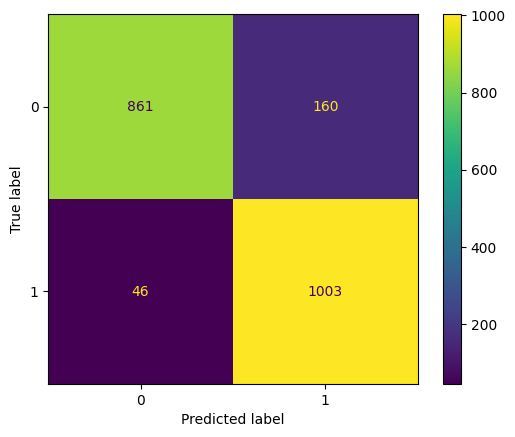

In [ ]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import precision_score
# Get the precision scores
test_precision = precision_score(y_test, y_pred)
print("The precision is ", test_precision)

The precision is  0.8624247635425624


In [ ]:
from sklearn.metrics import recall_score
# Get the recall scores
test_recall = recall_score(y_test, y_pred)
print("The recall on test data is ", test_recall)

The recall on test data is  0.9561487130600572


In [ ]:
from sklearn.metrics import f1_score
# Get the f1 scores
test_f1 = f1_score(y_test, y_pred)
print("The f1 score on test data is ", test_f1)

The f1 score on test data is  0.906871609403255


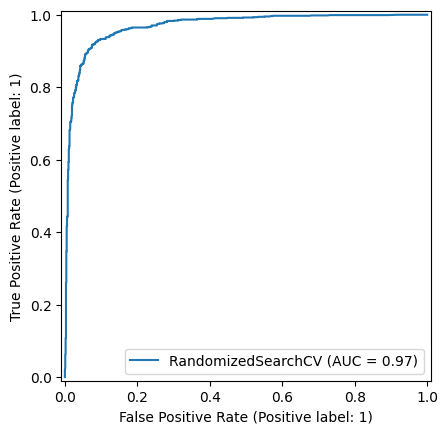

In [ ]:
# Plot The ROC curve
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.show()

**Model Evaluation Summary**

### **Performance Metrics**
------------------------------------------------------------------------------

- **Confusion Matrix:**
  - **True Positives (Class 1):** 1003
  - **True Negatives (Class 0):** 861
  - **False Positives (Class 1):** 46
  - **False Negatives (Class 0):** 160

------------------------------------------------------------------------------
- **Class 0:**
  - **Precision:** 0.95
    - Out of all customers the model predicted as “not churning”, 94.93% truly did not churn.

    📌 Meaning: If the model says someone is safe (no churn), it's usually right.
    
  - **Recall:** 0.84
   - Out of all actual non-churners, the model correctly identified 84.33%.
    
    📌 Meaning: It missed about 15.67% of loyal customers, wrongly tagging them as churners.


  - **F1-Score:** 0.89

------------------------------------------------------------------------------
- **Class 1:**
  - **Precision:** 0.86
   - Out of all customers the model predicted as churners, 86.21% actually churned.
    
    📌 Meaning: The model is fairly accurate when it predicts someone will churn.
  - **Recall:** 0.96
   - Out of all actual churners, the model correctly identified 95.61%.
    
    📌 Meaning: The model catches nearly all the churners — very good for retention efforts.


  - **F1-Score:** 0.91


------------------------------------------------------------------------------





- Overall **Precision:**  0.86
 - Out of all customers the model predicted will churn, 86% actually did churn.

    📌 Business meaning:
    We're not wasting too many resources targeting people who wouldn't churn — predictions are reasonably accurate.


- Overall **Recall:** 0.95
 - Out of all customers who actually churned, 95% were successfully identified by the model.

    📌 Business meaning:
    This is very good — the model catches almost all at-risk customers, allowing the company to intervene before churn happens.




- Overall **F1 Score:** 0.90
 - The harmonic mean of precision and recall.

    📌 Business meaning:
    Our model has a strong balance between catching churners and being accurate about them.




------------------------------------------------------------------------------






- **AUC (Area Under the Curve):** 0.97
 - Our model has a 97% chance of ranking a randomly chosen churner (Class 1) higher than a randomly chosen non-churner (Class 0) in terms of predicted probability.



------------------------------------------------------------------------------





### **Summary**
Our model is highly effective at identifying at-risk customers, with minimal false negatives
making it a reliable tool for retention efforts.


# **6. Conclusion**

---

**Exploratory Data Analysis (EDA) Insights:**
1. **Total Customers**: 7,043 total customers.
2. **Churn Rate**:
   - **Churned**: 1,869 (approximately **26.54%**).
   - **Non-Churned**: 5,174 (approximately **73.46%**).
3. **Monthly Charges**:
   - Average for churned customers: 74.44 Dollars.
   - Average for non-churned customers:  61.27 Dollars.

4. **Tenure**:
   - Average tenure for churned customers: **17.98 months**.
   - Average tenure for non-churned customers: **37.57 months**.
5. **Total Charges**:
   - Average total charges for churned customers: **1,531.80** Dollars.
   - Average total charges for non-churned customers: **2,552.88** Dollars.
6. **Service Usage**:
   - 1,699 churned customers had phone service; only **170** did not.
   - Fiber optic users had the highest churn at **1,297**, followed by DSL at **459**.


---


**Machine Learning (ML) Insights:**
1. **Model Performance**:
   - **Random Forest**:
     - Accuracy: **89.05%**.
     - Precision: **86.24%**.
     - Recall: **95.61%**.
     - F1 Score: **90.69**.
   - **Decision Tree**:
     - Accuracy: **88.50%**.
     - Precision: **83.76%**.
     - Recall: **95.90%**.
     - F1 Score: **89.42**.
2. **Confusion Matrix** (best model):
   - True Positives (Churned correctly predicted): **1,003**.
   - True Negatives (Non-churned correctly predicted): **861**.
   - False Positives (Wrongly predicted as churned): **46**.
   - False Negatives (Missed churned customers): **160**.
3. **AUC Score**: **0.97**, indicating very high effectiveness in identifying at-risk customers.
---

**Business Recommendations:**
1. **Resource Allocation**: Focus retention strategies on the **1,869** at-risk customers to improve overall customer satisfaction and reduce churn cost.
2. **Customer Segmentation**:
   - Target **customers with higher monthly charges** and shorter tenures as they show the highest risk of churn.
   - Monitor customers with fiber optic internet service, as they have the highest churn rate.
3. **Retention Strategy Development**: Enhance tailored retention strategies based on specific customer service usage patterns, as indicated by churn statistics.






---


---




# About me




Hi, I’m Anshuman Chawhan,
An innovative Data Science enthusiast with a strong foundation in Python, SQL, Excel, Tableau, and Power BI.

Passionate about transforming raw data into actionable insights, I bring a methodical approach to problem-solving and a commitment to leveraging data to drive strategic business decisions.

Skilled in managing and analyzing complex datasets, developing insightful reports, and designing impactful dashboards.


- 👋 Hi, I’m Anshuman Chawhan
- 👀 I’m interested in Data Science and Data Analysis.
- 🌱 I have completed the Advanced Certification in Full Stack Data Science and AI (E&ICT) from IIT Guwahati.
- 💼 Actively seeking impactful roles — internships or full-time — where I can apply my data science skills to drive real-world results.
- 📫 How to reach me
    - Linkedin-  https://www.linkedin.com/in/anshumanchawhan/
    - Email- chawhananshuman1@gmail.com
